In [2]:
# Load Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
women_r=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')


In [4]:
#make copy to EDA
wr=women_r.copy()

# DATA EXPLORATION 

In [5]:
wr.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
wr.shape

(23486, 11)

In [7]:
wr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [8]:
wr.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [9]:
wr.duplicated().sum()

0

In [10]:
wr.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

## CLEAN DATA

In [11]:
wr.drop(columns=['Unnamed: 0'],inplace=True)

In [12]:
# change the name of columns to be easy to use 
c={'Clothing ID':'Clothing_ID','Review Text':'Review_Text','Recommended IND':'Recommended_IND',
   'Positive Feedback Count':'P_Feedback_Count','Division Name':'Division_Name','Department Name':'Department_Name',
   'Class Name':'Class_Name'}

wr.rename(columns=c,inplace=True)

In [13]:
wr.columns

Index(['Clothing_ID', 'Age', 'Title', 'Review_Text', 'Rating',
       'Recommended_IND', 'P_Feedback_Count', 'Division_Name',
       'Department_Name', 'Class_Name'],
      dtype='object')

In [14]:
# drop (nan) in columns that not effect in row of the data 
wr.dropna(subset=['Division_Name',
                   'Department_Name', 'Class_Name'],inplace=True)

In [15]:
wr.isnull().sum()

Clothing_ID            0
Age                    0
Title               3809
Review_Text          844
Rating                 0
Recommended_IND        0
P_Feedback_Count       0
Division_Name          0
Department_Name        0
Class_Name             0
dtype: int64

## Analysis & Visualization  


In [16]:
wr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23472 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Clothing_ID       23472 non-null  int64 
 1   Age               23472 non-null  int64 
 2   Title             19663 non-null  object
 3   Review_Text       22628 non-null  object
 4   Rating            23472 non-null  int64 
 5   Recommended_IND   23472 non-null  int64 
 6   P_Feedback_Count  23472 non-null  int64 
 7   Division_Name     23472 non-null  object
 8   Department_Name   23472 non-null  object
 9   Class_Name        23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


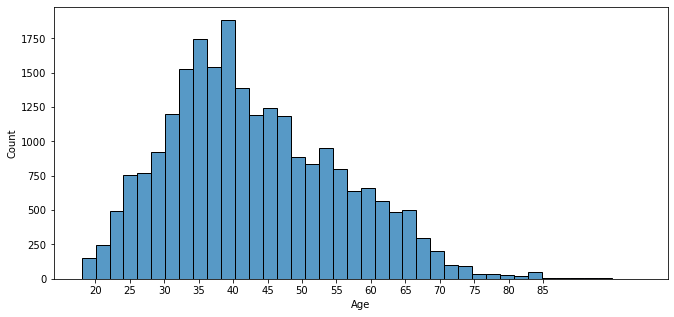

In [17]:
#make visualize for age to see our target  consumer 
plt.figure(figsize=(11,5))
sns.histplot(x='Age',data=wr,bins=40)
plt.xticks(np.arange(20,90,5))
plt.show()

We can say that, age group 25-50 is the most receiving age group (the best consumer)

Now, let's have a look deeper for the distribution of age.

**we can't deal with all age in commerce so we must grouped into category of age to make good analysis and targeting.

so we will age group  then make analysis for each  group 

In [20]:
wr['age_group']=pd.cut(x=wr['Age'],bins=[25,30,35,40,50],labels=(['25:30','30:35','35:40','40:50']))

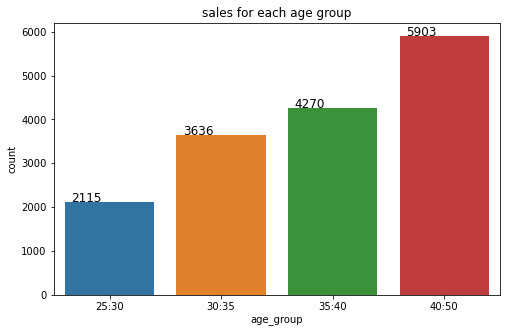

In [21]:
plt.figure(figsize=(8,5))
ax=sns.countplot(x=wr['age_group'])

plt.title('sales for each age group')
for i in ax.patches:
    ax.text(i.get_x()+.06,i.get_height()+2.6,str(int((i.get_height()))),
            rotation=0,fontsize=12,color='black')
plt.show()

Text(0.5, 1.0, 'Department Name & age')

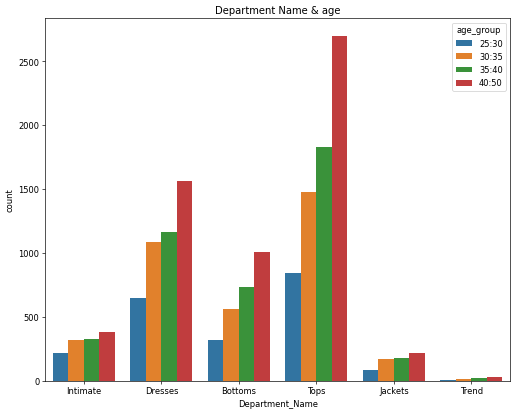

In [306]:
plt.figure(figsize=(10,8),dpi=60)
ax=sns.countplot(x='Department_Name',data=wr,hue='age_group')
plt.title('Department Name & age')

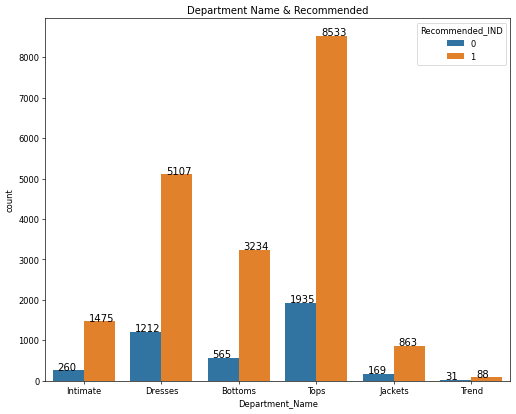

In [309]:
plt.figure(figsize=(10,8),dpi=60)
ax=sns.countplot(x='Department_Name',data=wr,hue='Recommended_IND')
plt.title('Department Name & Recommended')
for i in ax.patches:
    ax.text(i.get_x()+.06,i.get_height()+2.6,str(int((i.get_height()))),
            rotation=0,fontsize=12,color='black')
plt.show()

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


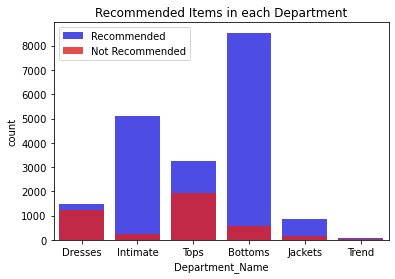

In [349]:
recommended = wr[wr['Recommended_IND']==1]
not_recommended = wr[wr['Recommended_IND']==0]
ax = sns.countplot(recommended['Department_Name'], color="blue", alpha = 0.8, label = "Recommended")
ax = sns.countplot(not_recommended['Department_Name'], color="red", alpha = 0.8, label = "Not Recommended")
ax = plt.title("Recommended Items in each Department")
ax = plt.legend()
plt.show()

## Now let's get deeper into each age group

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


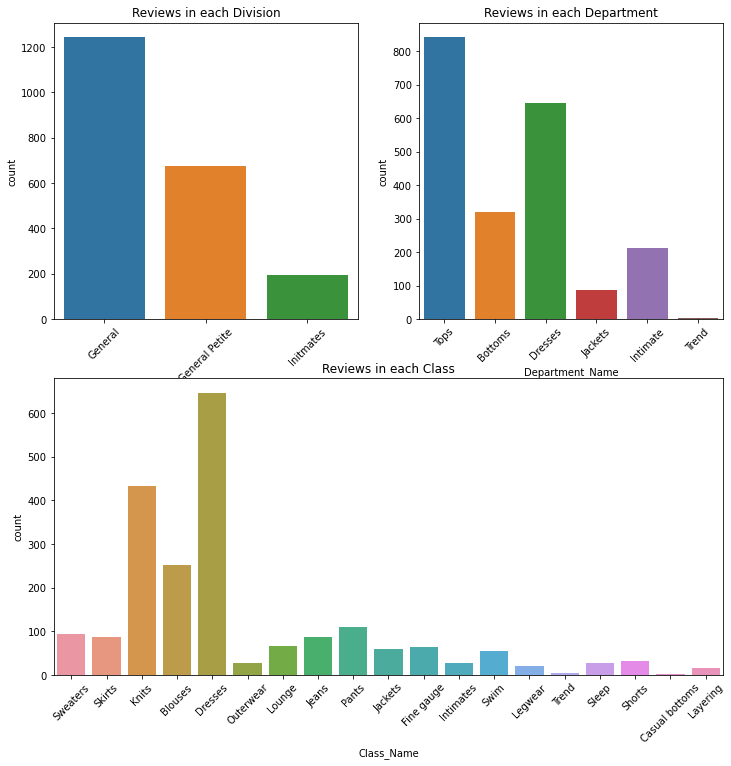

In [342]:
#what is the best (Divisions) for this age_group [25:30]?
a=wr[wr['age_group']=='25:30']

#the best Division_Name for sell
fig = plt.figure(figsize=(12, 12))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=45)
ax1 = sns.countplot(a['Division_Name'])
ax1 = plt.title("Reviews in each Division")

#the best Department_Name for sell
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=45)
ax2 = sns.countplot(a['Department_Name'])
ax2 = plt.title("Reviews in each Department")

#the best Class_Name for sell
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.countplot(a['Class_Name'])
ax3 = plt.title("Reviews in each Class")

plt.show()

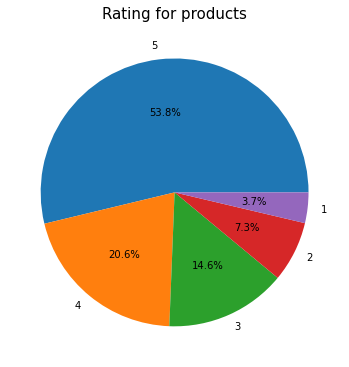

In [217]:
a=wr[wr['age_group']=='25:30']
plt.figure(figsize=(6,10))
x=a['Rating'].value_counts()
labels=x.index
plt.pie(x,autopct='%0.1f%%',labels=labels)
plt.title('Rating for products',color='black',size=(15))
plt.show()

this Age_category it is very satisfied it is about more than 70% get more than 3 star for this brand

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


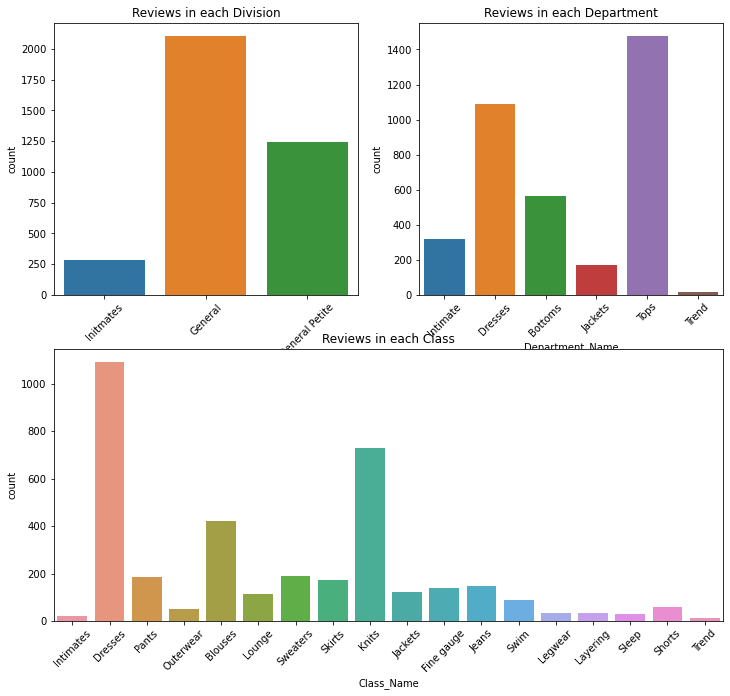

In [343]:
#what is the best (Divisions) for this age_group [25:30]?
a=wr[wr['age_group']=='30:35']

#the best Division_Name for sell
fig = plt.figure(figsize=(12, 11))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=45)
ax1 = sns.countplot(a['Division_Name'])
ax1 = plt.title("Reviews in each Division")

#the best Department_Name for sell
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=45)
ax2 = sns.countplot(a['Department_Name'])
ax2 = plt.title("Reviews in each Department")

#the best Class_Name for sell
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.countplot(a['Class_Name'])
ax3 = plt.title("Reviews in each Class")

plt.show()

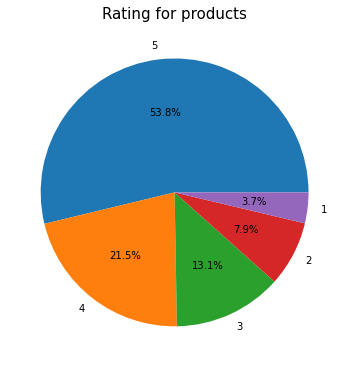

In [324]:
a=wr[wr['age_group']=='30:35']
plt.figure(figsize=(6,10))
x=a['Rating'].value_counts()
labels=x.index
plt.pie(x,autopct='%0.1f%%',labels=labels)
plt.title('Rating for products',color='black',size=(15))
plt.show()

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


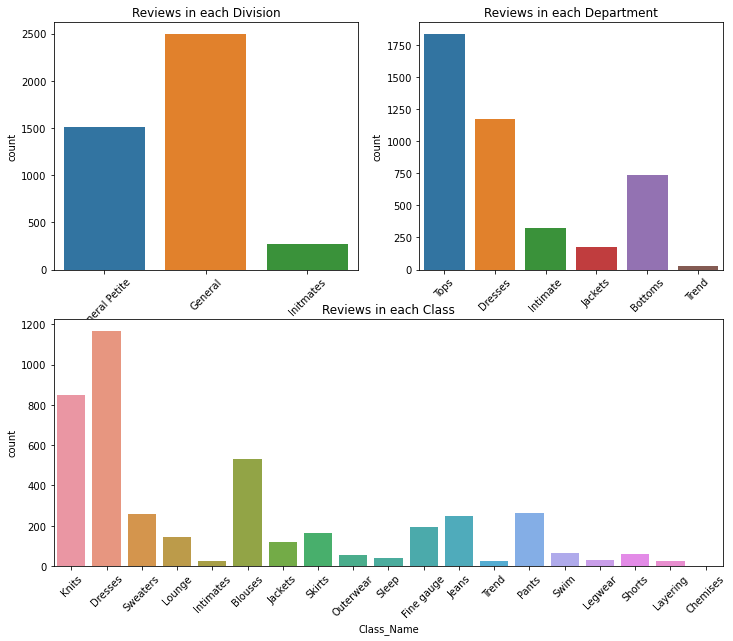

In [230]:
#what is the best (Divisions) for this age_group [35:40]?
a=wr[wr['age_group']=='35:40']

#the best Division_Name for sell
fig = plt.figure(figsize=(12, 10))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=45)
ax1 = sns.countplot(a['Division_Name'])
ax1 = plt.title("Reviews in each Division")

#the best Department_Name for sell

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=45)
ax2 = sns.countplot(a['Department_Name'])
ax2 = plt.title("Reviews in each Department")

#the best Class_Name for sell
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.countplot(a['Class_Name'])
ax3 = plt.title("Reviews in each Class")

plt.show()

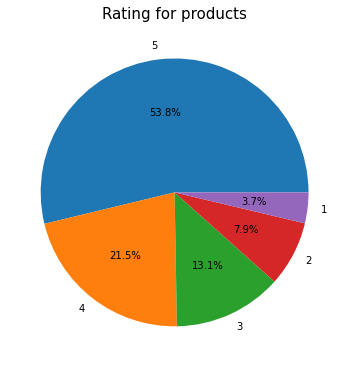

In [345]:
a=wr[wr['age_group']=='30:35']
plt.figure(figsize=(6,10))
x=a['Rating'].value_counts()
labels=x.index
plt.pie(x,autopct='%0.1f%%',labels=labels)
plt.title('Rating for products',color='black',size=(15))
plt.show()

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


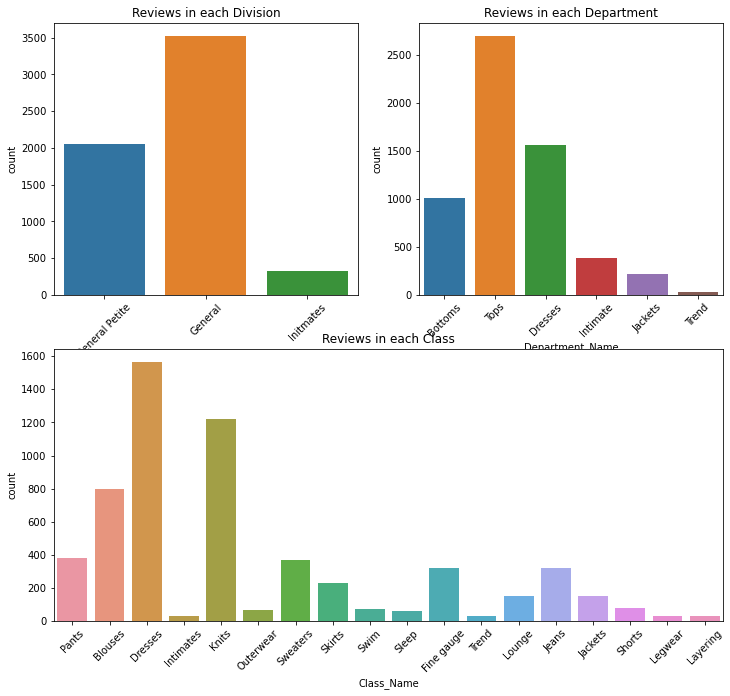

In [344]:
a=wr[wr['age_group']=='40:50']

#the best Division_Name for sell
fig = plt.figure(figsize=(12, 11))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=45)
ax1 = sns.countplot(a['Division_Name'])
ax1 = plt.title("Reviews in each Division")

#the best Department_Name for sell
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=45)
ax2 = sns.countplot(a['Department_Name'])
ax2 = plt.title("Reviews in each Department")

#the best Class_Name for sell
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=45)
ax3 = sns.countplot(a['Class_Name'])
ax3 = plt.title("Reviews in each Class")

plt.show()

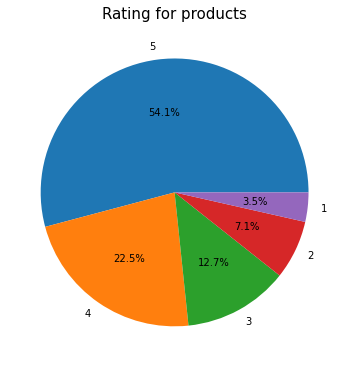

In [347]:
a=wr[wr['age_group']=='40:50']
plt.figure(figsize=(6,10))
x=a['Rating'].value_counts()
labels=x.index
plt.pie(x,autopct='%0.1f%%',labels=labels)
plt.title('Rating for products',color='black',size=(15))
plt.show()